# Анализ кредитных данных

## Выполнила Коробкова Екатерина (магистратура, группа 3822М1ФИвм)

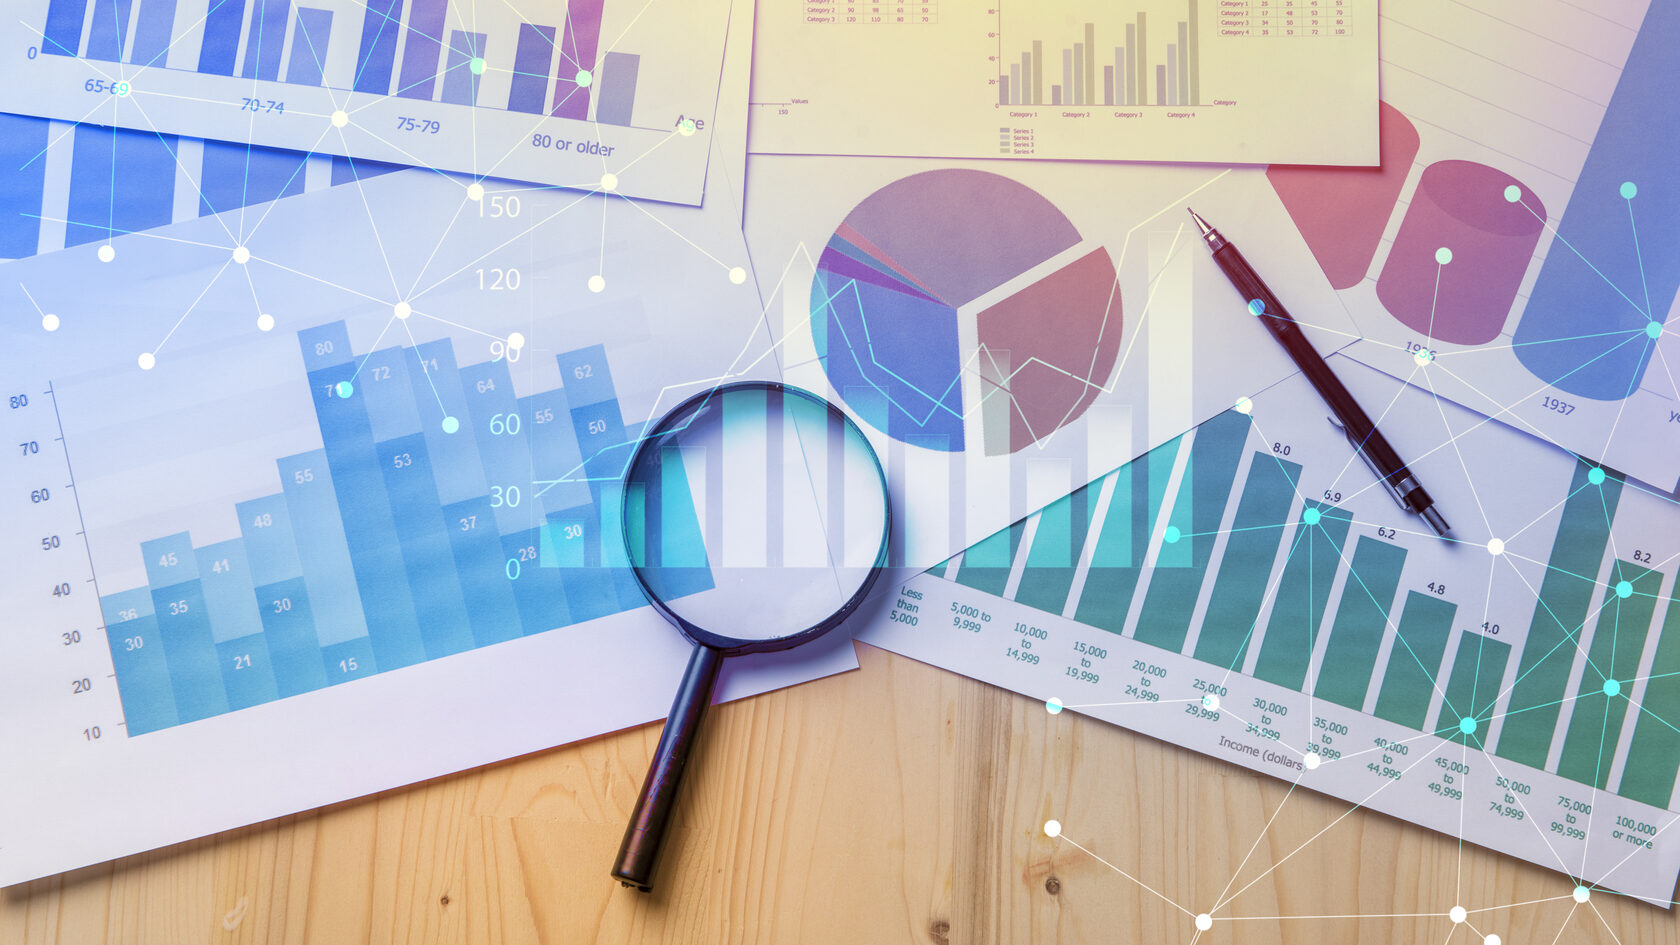

## 0. Постановка задачи

Финансовая компания производит сбор информации, а именно собирает основные банковские реквизиты своих клиентов. Благодаря этой информации составляется кредитная история каждого клиента фирмы. 
Руководство компании задалось задачей создания интеллектуальной системы для распределения людей по группам кредитных рейтингов, что, в свою очередь, сможет упростить работу сотрудников.

Цель классификации: определить, к какому классу клиентов (за это отвечает признак Credit_Score) относится определенный клиент фирмы (Poor, Standard, Good). Набор данных содержит обучающие, а также тестовые данные.

## 1. Чтение данных

Добавим основные библиотеки, которые будем использовать:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cmath import nan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

Теперь загрузим данные.

In [3]:
data = pd.read_csv('./credit/train.csv')

C:\Users\1\AppData\Local\Temp\ipykernel_940\749338034.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./credit/train.csv')


In [4]:
data

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                               ...   

In [5]:
data.shape

(100000, 28)

Таблица содержит данные о 100000 клиентов по 28 признакам. (N = 100 000, d = 28, классов K = 3 (Credit_Score).

Выведем все эти признаки:


In [6]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Перечислим эти признаки:

1. ID - идентификатор записи в данных;
2. Customer_ID - идентификатор клиента;
3. Month - месяц записи о клиенте;
4. Name - имя;
5. Age - возраст;
6. SSN - номер соц. страхования;
7. Occupation - данные о работе;
8. Annual_Income - годовой доход;
9. Monthly_Inhand_Salary - ЗП в месяц;
10. Num_Bank_Accounts - число банковских счетов клиента;
11. Num_Credit_Card - число кредитных карт у клиента, не считая той, которая используется этой компанией;
12. Interest_Rate - процентная ставка по кредитной карте;
13. Num_of_Loan - число кредитов;
14. Type_of_Loan - виды займов, взятых клиентом в банке;
15. Delay_from_due_date - среднее число дней задержки с даты платежа;
16. Num_of_Delayed_Payment - среднее число платежей, которые клиент задерживал;
17. Changed_Credit_Limit - процентное изменение лимита кредитной карты;
18. Num_Credit_Inquiries - число запросов по кредитной;
19. Credit_Mix - классификация сочетания кредитов;
20. Outstanding_Debt - оставшийся долг, который необходимо выплатить в долларах;
21. Credit_Utilization_Ratio - коэффициент пользования кредитной картой;
22. Credit_History_Age - кол-во лет, которое используется кредитный счёт;
23. Payment_of_Min_Amount - была ли выплача лицом только минимальная сумма (а именно Yes, No, NM);
24. Total_EMI_per_month - ежемесячные платежи EMI;
25. Amount_invested_monthly - ежемесячая сумма, инвестированная клиентом в долларах;
26. Payment_Behaviour - платежное поведие клиента в долларах;
27. Monthly_Balance - ежемесячная сумма баланса клиента в долларах;
28. Credit_Score - кредитный рейтинг (а именно Poor, Standard, Good).

Теперь посмотрим, какие типы у данных признаков.

In [7]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

 Тип данных "Object"необходимо обработать.

Признаки Name, Month и Type_of_Loan переведем в специальный тип, который нужен для хранения категориальных признаков:

In [8]:
data["Month"] = data["Month"].astype("category")
data["Name"] = data["Name"].astype("category")

In [9]:
data['Type_of_Loan'].replace([np.NaN], None, inplace=True)
data["Type_of_Loan"] = data["Type_of_Loan"].astype("category")

Получаем:

In [10]:
data["Month"]

0         January
1        February
2           March
3           April
4             May
           ...   
99995       April
99996         May
99997        June
99998        July
99999      August
Name: Month, Length: 100000, dtype: category
Categories (8, object): ['April', 'August', 'February', 'January', 'July', 'June', 'March', 'May']

In [11]:
data["Name"]

0        Aaron Maashoh
1        Aaron Maashoh
2        Aaron Maashoh
3        Aaron Maashoh
4        Aaron Maashoh
             ...      
99995            Nicks
99996            Nicks
99997            Nicks
99998            Nicks
99999            Nicks
Name: Name, Length: 100000, dtype: category
Categories (10139, object): [' Mattr', ' Mattx', ' Stevei', ' Stevep', ..., 'ty', 'yi', 'yk', 'yv']

In [12]:
data["Type_of_Loan"]

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100000, dtype: category
Categories (6260, object): ['Auto Loan', 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, C..., 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, S..., 'Auto Loan, Auto Loan, Auto Loan, Credit-Build..., ..., 'Student Loan, and Not Specified', 'Student Loan, and Payday Loan', 'Student Loan, and Personal Loan

Рассмотрим признак Age. У некоторых клиентов после возраста идет нижнее подчеркивание, уберем его. Также необходимо произвести проверку на допустимые пределы по возрасту. В большинстве фирм это от 0 до 100.

In [13]:
def AgeEditing(row):
    l = len(row.Age)
    if((issubclass(type(row.Age), str)) and (row.Age[l-1] == '_')):
        age = int(row.Age[:l-1])
        return age
    else:
        age = int(row.Age[:l])
        return age
        
data['Age'] = data.apply(AgeEditing, axis = 1)

def AgeLim(row):
    if((row.Age > 100) or (row.Age < 0)):
        return None
    else: return row.Age

data['Age'] = data.apply(AgeLim, axis = 1)

Результат:
    

In [14]:
data['Age']

0        23.0
1        23.0
2         NaN
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

У признака Annual_Income тоже есть нижние подчеркивания, проделаем с данным признакам то же самое.

In [15]:
def AnnualIncomeEditing(row):
    l = len(row.Annual_Income)
    if((issubclass(type(row.Annual_Income), str)) and (row.Annual_Income[l-1] == '_')):
        an = row.Annual_Income[:l-1]
        return an
    elif(issubclass(type(row.Annual_Income), str)):
        an = row.Annual_Income[:l]
        return an
    else:
        an = row.Annual_Income
        return an

In [16]:
data["Annual_Income"] = data.apply(AnnualIncomeEditing, axis = 1)

In [17]:
data["Annual_Income"] = data["Annual_Income"].astype(float)

Получаем:

In [18]:
data["Annual_Income"]

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: float64

Признак Num_of_Loan содержит в себе те же проблемы, что и признак Age и Annual_Income (Нижние подчеркивания). Поступим с ним также.

In [19]:
def NumOfLoanEditing(row):
    x = len(row.Num_of_Loan)
    if((issubclass(type(row.Num_of_Loan), str)) and (row.Num_of_Loan[x-1] == '_')):
        nol = int(row.Num_of_Loan[:x-1])
        return nol
    else:
        nol = int(row.Num_of_Loan[:x])
        return nol

def NumOfLoan(row):
    if(row.Num_of_Loan < 0 ): return None
    else: return row.Num_of_Loan

In [20]:
data['Num_of_Loan'] = data.apply(NumOfLoanEditing, axis = 1)

In [21]:
data["Num_of_Loan"] = data.apply(NumOfLoan, axis = 1)

In [22]:
data["Num_of_Loan"]

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    2.0
99996    2.0
99997    2.0
99998    2.0
99999    2.0
Name: Num_of_Loan, Length: 100000, dtype: float64

В признаке Changed_Credit_Limit необходимо обработать "_".

In [23]:
def ChangedCreditLimitEditing(row):
    if(row.Changed_Credit_Limit == '_'): return None
    else: return row.Changed_Credit_Limit

In [24]:
data["Changed_Credit_Limit"] = data.apply(ChangedCreditLimitEditing, axis=1)

In [25]:
data["Changed_Credit_Limit"] = data["Changed_Credit_Limit"].astype(float)

In [26]:
data["Changed_Credit_Limit"]

0        11.27
1        11.27
2          NaN
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

Признак ID переведем в числовой:

In [27]:
data['ID'] = data.ID.apply(lambda x: int(x, 16))

Получаем:
    

In [28]:
data['ID']

0          5634
1          5635
2          5636
3          5637
4          5638
          ...  
99995    155625
99996    155626
99997    155627
99998    155628
99999    155629
Name: ID, Length: 100000, dtype: int64

Произведем аналогичную операцию с Customer_ID:

In [29]:
data['Customer_ID'] = data.Customer_ID.apply(lambda x: int(x[4:], 16))

Получим:

In [30]:
data['Customer_ID']

0         3392
1         3392
2         3392
3         3392
4         3392
         ...  
99995    37932
99996    37932
99997    37932
99998    37932
99999    37932
Name: Customer_ID, Length: 100000, dtype: int64

Прежде, чем переводить признак SNN в категориальный тип, необходимо исключить недопустимые значения.

In [31]:
def SSN(row):
    if(row.SSN == '#F%$D@*&8'):
        return None
    else: return row.SSN

data['SSN'] = data.apply(SSN, axis=1)

Теперь переведем его в категориальный тип.

In [32]:
data["SSN"] = data["SSN"].astype("category")

Получаем:

In [33]:
data["SSN"]

0        821-00-0265
1        821-00-0265
2        821-00-0265
3        821-00-0265
4        821-00-0265
            ...     
99995    078-73-5990
99996    078-73-5990
99997    078-73-5990
99998    078-73-5990
99999    078-73-5990
Name: SSN, Length: 100000, dtype: category
Categories (12500, object): ['000-08-1349', '000-40-3312', '000-58-0568', '000-60-0688', ..., '999-84-9578', '999-92-7186', '999-95-7259', '999-99-3421']

Произведем такую же операцию с признаком Ocupation.

In [34]:
def Occupation(row):
    if(row.Occupation == '_______'):
        return None
    else: return row.Occupation

data["Occupation"] = data.apply(Occupation, axis=1)

In [35]:
data["Occupation"] = data["Occupation"].astype("category")

In [36]:
data["Occupation"]

0        Scientist
1        Scientist
2        Scientist
3        Scientist
4        Scientist
           ...    
99995     Mechanic
99996     Mechanic
99997     Mechanic
99998     Mechanic
99999     Mechanic
Name: Occupation, Length: 100000, dtype: category
Categories (15, object): ['Accountant', 'Architect', 'Developer', 'Doctor', ..., 'Musician', 'Scientist', 'Teacher', 'Writer']

Посмотрим, какие еще признаки осталось предобработать.

In [37]:
data.dtypes

ID                             int64
Customer_ID                    int64
Month                       category
Name                        category
Age                          float64
SSN                         category
Occupation                  category
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                  float64
Type_of_Loan                category
Delay_from_due_date            int64
Num_of_Delayed_Payment        object
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt              object
Credit_Utilization_Ratio     float64
Credit_History_Age            object
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly       object
Payment_Behaviour             object
Monthly_Balance               object
C

Признаки Num_Bank_Accounts, Num_Credit_Card, Interest_Rate и Delay_from_due_date нужно проверить на допустимые значения, они должны быть положительными. А Interest_Rate не более 100%.

In [38]:
def NumBankAccounts(row):
    if(row.Num_Bank_Accounts < 0 ): return None
    else: return row.Num_Bank_Accounts

def NumCreditCard(row):
    if(row.Num_Credit_Card < 0 ): return None
    else: return row.Num_Credit_Card
    
def InterestRate(row):
    if((row.Interest_Rate < 0) or (row.Interest_Rate > 100 )): return None
    else: return row.Interest_Rate
    
def DelayFromDueDate(row):
    if(row.Delay_from_due_date < 0 ): return None
    else: return row.Delay_from_due_date

In [39]:
data["Num_Bank_Accounts"] = data.apply(NumBankAccounts, axis = 1)
data["Num_Credit_Card"] = data.apply(NumCreditCard, axis = 1)
data["Interest_Rate"] = data.apply(InterestRate, axis = 1)
data["Delay_from_due_date"] = data.apply(DelayFromDueDate, axis = 1)

Получаем:

In [40]:
data["Num_Bank_Accounts"]

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    4.0
99996    4.0
99997    4.0
99998    4.0
99999    4.0
Name: Num_Bank_Accounts, Length: 100000, dtype: float64

In [41]:
data["Num_Credit_Card"]

0        4
1        4
2        4
3        4
4        4
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: Num_Credit_Card, Length: 100000, dtype: int64

In [42]:
data["Interest_Rate"]

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    7.0
99996    7.0
99997    NaN
99998    7.0
99999    7.0
Name: Interest_Rate, Length: 100000, dtype: float64

In [43]:
data["Delay_from_due_date"]

0         3.0
1         NaN
2         3.0
3         5.0
4         6.0
         ... 
99995    23.0
99996    18.0
99997    27.0
99998    20.0
99999    18.0
Name: Delay_from_due_date, Length: 100000, dtype: float64

Признак Credit_Mix преобразуем в категориальный признак. Также необходимо избавиться от '_'.

In [44]:
def CreditMixEditing(row):
    if(row.Credit_Mix == '_'): return None
    else: return row.Credit_Mix

In [45]:
data["Credit_Mix"] = data.apply(CreditMixEditing, axis = 1)   
data["Credit_Mix"] = data["Credit_Mix"].astype("category")

Получаем:

In [46]:
data["Credit_Mix"] 

0         NaN
1        Good
2        Good
3        Good
4        Good
         ... 
99995     NaN
99996     NaN
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, Length: 100000, dtype: category
Categories (3, object): ['Bad', 'Good', 'Standard']

Признак Outstanding_Debt переведем в числовой, но сначала поаботимся о такой же проблеме с нижними подчеркиваниями в конце.

In [47]:
def OutstandingDebEditing(row):
    if(type(row.Outstanding_Debt) == str):
        l = len(row.Outstanding_Debt)
        if(row.Outstanding_Debt[l-1] == '_'):
            odebt = row.Outstanding_Debt[:l-1]
            return odebt
        else:
            odebt = row.Outstanding_Debt[:l]
            return odebt
    else: return row.Outstanding_Debt

In [48]:
data["Outstanding_Debt"] = data.apply(OutstandingDebEditing, axis = 1)
data["Outstanding_Debt"] = data["Outstanding_Debt"].astype(float)

Получаем:

In [49]:
data["Outstanding_Debt"]

0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 100000, dtype: float64

Признак Credit_History_Age также переведем в числовой (в число месяцев пользования кредитной картой).

In [50]:
def CreditHistoryAgeEditingInMonths(x):
    if(type(x.Credit_History_Age) != float):
        if (x.Credit_History_Age != None):
            z = x.Credit_History_Age.split(' ')
            num1 = int(z[0])
            num2 = int(z[3])
            return (num1 * 12) + num2
        else: return x.Credit_History_Age
    else: return x.Credit_History_Age

In [51]:
data["Credit_History_Age"] = data.apply(CreditHistoryAgeEditingInMonths, axis = 1)

Получаем:

In [52]:
data["Credit_History_Age"]

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

Признак Num_of_Delayed_Payment переведем в числовой, а также проверим на недопустимые значения.

In [53]:
def NumOfDelayedPaymentEditing(row):    
    if (issubclass(type(row.Num_of_Delayed_Payment), str)):
        l = len(row.Num_of_Delayed_Payment)
        if (row.Num_of_Delayed_Payment[l-1] == '_'):
            nodp = int(row.Num_of_Delayed_Payment[:l-1])
            return nodp
        else:
            nodp = int(row.Num_of_Delayed_Payment[:l])
            return nodp
    else: return row.Num_of_Delayed_Payment  

In [54]:
data["Num_of_Delayed_Payment"] = data.apply(NumOfDelayedPaymentEditing, axis = 1)

Получаем:

In [55]:
data["Num_of_Delayed_Payment"]

0        7.0
1        NaN
2        7.0
3        4.0
4        NaN
        ... 
99995    7.0
99996    7.0
99997    6.0
99998    NaN
99999    6.0
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64

Признак Payment_of_Min_Amount переведем в бинарный тип. Заменим да единицей, а нет нулем.

In [56]:
if type(data["Payment_of_Min_Amount"].iloc[0]) == str:
    data["Payment_of_Min_Amount"] = data["Payment_of_Min_Amount"].apply(lambda x: 1 if x == "Yes" else (0 if x == "No" else None))


In [57]:
data["Payment_of_Min_Amount"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: Payment_of_Min_Amount, Length: 100000, dtype: float64

Признак Amount_invested_monthly переведем в числовой тип, но также нужно убрать недопустимые значения.

In [58]:
def AmountInvestedMonthlyEditing(row):
    if(row.Amount_invested_monthly == '__10000__'): return None
    else: return row.Amount_invested_monthly

In [59]:
data["Amount_invested_monthly"] = data.apply(AmountInvestedMonthlyEditing, axis = 1)
data["Amount_invested_monthly"] = data["Amount_invested_monthly"].astype(float)

Получаем:

In [60]:
data["Amount_invested_monthly"]

0         80.415295
1        118.280222
2         81.699521
3        199.458074
4         41.420153
            ...    
99995     60.971333
99996     54.185950
99997     24.028477
99998    251.672582
99999    167.163865
Name: Amount_invested_monthly, Length: 100000, dtype: float64

Проверим еще раз, что осталось предобработать.

In [61]:
data.dtypes

ID                             int64
Customer_ID                    int64
Month                       category
Name                        category
Age                          float64
SSN                         category
Occupation                  category
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts            float64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                  float64
Type_of_Loan                category
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                  category
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age           float64
Payment_of_Min_Amount        float64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance               object
C

Признаки Payment_Behaviour и Monthly_Balance имеют недопустимые значения. Необходимо исключить их. Переведем соответственно в категориальный и в числовой типы.

In [62]:
def PaymentBehaviour(row):
    if(row.Payment_Behaviour == '!@9#%8'): return None
    else: return row.Payment_Behaviour

def MonthlyBalance(row):
    if(row.Monthly_Balance == '__-333333333333333333333333333__'): return None
    else: return row.Monthly_Balance

In [63]:
data["Payment_Behaviour"] = data.apply(PaymentBehaviour, axis = 1)
data["Monthly_Balance"] = data.apply(MonthlyBalance, axis = 1)

data["Payment_Behaviour"] = data["Payment_Behaviour"].astype("category")
data["Monthly_Balance"] = data["Monthly_Balance"].astype(float)

Получаем:

In [64]:
data["Payment_Behaviour"]

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999                                 NaN
Name: Payment_Behaviour, Length: 100000, dtype: category
Categories (6, object): ['High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments']

In [65]:
data["Monthly_Balance"]

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995    479.866228
99996    496.651610
99997    516.809083
99998    319.164979
99999    393.673696
Name: Monthly_Balance, Length: 100000, dtype: float64

Переходим к последнему признаку Credit_Score. Именно его мы будем предсказывать. Переведем его в категориальный тип.

In [66]:
def CreditScore(row):
    if(row.Credit_Score == 'Poor'): return 0
    elif(row.Credit_Score == 'Standard'): return 1
    else: return 2

In [67]:
data.Credit_Score = data.apply(CreditScore, axis = 1)

In [68]:
data.Credit_Score

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

Получаем типы данных:

In [69]:
data.dtypes

ID                             int64
Customer_ID                    int64
Month                       category
Name                        category
Age                          float64
SSN                         category
Occupation                  category
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts            float64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                  float64
Type_of_Loan                category
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                  category
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age           float64
Payment_of_Min_Amount        float64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour           category
Monthly_Balance              float64
C

А сама таблица выглядит так:

In [70]:
data

ID  Customer_ID     Month           Name   Age          SSN  \
0        5634         3392   January  Aaron Maashoh  23.0  821-00-0265   
1        5635         3392  February  Aaron Maashoh  23.0  821-00-0265   
2        5636         3392     March  Aaron Maashoh   NaN  821-00-0265   
3        5637         3392     April  Aaron Maashoh  23.0  821-00-0265   
4        5638         3392       May  Aaron Maashoh  23.0  821-00-0265   
...       ...          ...       ...            ...   ...          ...   
99995  155625        37932     April          Nicks  25.0  078-73-5990   
99996  155626        37932       May          Nicks  25.0  078-73-5990   
99997  155627        37932      June          Nicks  25.0  078-73-5990   
99998  155628        37932      July          Nicks  25.0  078-73-5990   
99999  155629        37932    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                3.0   
1      Scientist       19114.12                    NaN                3.0   
2      Scientist       19114.12                    NaN                3.0   
3      Scientist       19114.12                    NaN                3.0   
4      Scientist       19114.12            1824.843333                3.0   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                4.0   
99996   Mechanic       39628.99            3359.415833                4.0   
99997   Mechanic       39628.99            3359.415833                4.0   
99998   Mechanic       39628.99            3359.415833                4.0   
99999   Mechanic       39628.99            3359.415833                4.0   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                  265.0                    0.0            49.574949   
1                    NaN                    0.0            49.574949   
2                  267.0                    0.0            49.574949   
3                  268.0                    0.0            49.574949   
4                  269.0                    0.0            49.574949   
...                  ...                    ...                  ...   
99995              378.0                    0.0            35.104023   
99996              379.0                    0.0            35.104023   
99997              380.0                    0.0            35.104023   
99998              381.0                    0.0            35.104023   
99999              382.0                    0.0            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995          

## 2. Визуализация данных и вычисление основных характеристик

Основные характеристики для числовых признаков:

In [71]:
data.describe()

ID    Customer_ID           Age  Annual_Income  \
count  100000.000000  100000.000000  97224.000000   1.000000e+05   
mean    80631.500000   25982.666640     33.323274   1.764157e+05   
std     43301.486619   14340.543051     10.778909   1.429618e+06   
min      5634.000000    1006.000000     14.000000   7.005930e+03   
25%     43132.750000   13664.500000     24.000000   1.945750e+04   
50%     80631.500000   25777.000000     33.000000   3.757861e+04   
75%    118130.250000   38385.000000     42.000000   7.279092e+04   
max    155629.000000   50999.000000    100.000000   2.419806e+07   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000       99979.000000     100000.00000   
mean             4194.170850          17.095080         22.47443   
std              3183.686167         117.416871        129.05741   
min               303.645417           0.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate   Num_of_Loan  Delay_from_due_date  ...  \
count   97988.000000  96124.000000         99409.000000  ...   
mean       14.546679      7.163622            21.207245  ...   
std         8.798523     60.314923            14.794693  ...   
min         1.000000      0.000000             0.000000  ...   
25%         7.000000      2.000000            10.000000  ...   
50%        13.000000      3.000000            18.000000  ...   
75%        20.000000      5.000000            28.000000  ...   
max       100.000000   1496.000000            67.000000  ...   

       Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
count          97909.000000          98035.000000     100000.000000   
mean              10.389025             27.754251       1426.220376   
std                6.789496            193.177339       1155.129026   
min               -6.490000              0.000000          0.230000   
25%                5.320000              3.000000        566.072500   
50%                9.400000              6.000000       1166.155000   
75%               14.870000              9.000000       1945.962500   
max               36.970000           2597.000000       4998.070000   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
count             100000.000000        90970.000000           87993.000000   
mean                  32.285173          221.195405               0.594661   
std                    5.116875           99.741364               0.490960   
min                   20.000000            1.000000               0.000000   
25%                   28.052567          144.000000               0.000000   
50%                   32.305784          219.000000               1.000000   
75%                   36.496663          302.000000               1.000000   
max                   50.000000          404.000000               1.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  \
count        100000.000000             91216.000000     98791.000000   
mean           1403.118217               195.539456       402.551258   
std            8306.041270               199.564527       213.925499   
min               0.000000                 0.000000         0.007760   
25%              30.306660                72.236692       270.106630   
50%              69.249473               128.954538       336.731225   
75%             161.224249               236.815814       470.262938   
max           82331.000000              1977.326102      1602.040519   

       Credit_Score  
count  100000.00000  
mean        0.88830  
std         0.67512  
min         0.00000  
25%         0.00000  
50%         1.00000  
75%         1.00000  
max         2.00000  

[8 rows x 21 columns]

Теперь посмотрим на характеристики для категориальных признаков:

In [72]:
data.describe(include=['category'])

Month    Name          SSN Occupation   Type_of_Loan Credit_Mix  \
count   100000   90015        94428      92938          88592      79805   
unique       8   10139        12500         15           6260          3   
top      April  Langep  000-08-1349     Lawyer  Not Specified   Standard   
freq     12500      44            8       6575           1408      36479   

                     Payment_Behaviour  
count                            92400  
unique                               6  
top     Low_spent_Small_value_payments  
freq                             25513

Из преведенных выше данных можно сделать выводы:
- присутствует большое число пропущенных значений;
- средний годовой доход (Annual_Income) от 7 000 до 2 420 000 долларов;
- средний возраст клиентов фирмы 30-40 лет;
- у большинства есть задолженности по платежам;
- клиенты имеют разный уровень дохода;
- в среднем у большинства 5 кредитов;
- большинство клиентов оносятся в рейтингу "Standart".

В признаках Num_Credit_Card, Num_Bank_Accounts, Num_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries есть подозрение на наличие выбросов. Проверим это и избавимся от этих выбросов, если это так.

In [73]:
data["Num_Credit_Card"].quantile([.005,.01,.05,.1,.5, .8, .9,.95, .97, .99,.995])

0.005       1.0
0.010       1.0
0.050       3.0
0.100       3.0
0.500       5.0
0.800       7.0
0.900       9.0
0.950      10.0
0.970      10.0
0.990     849.0
0.995    1177.0
Name: Num_Credit_Card, dtype: float64

In [74]:
data["Num_Bank_Accounts"].quantile([.01,.05,.1,.5, .8, .9,.95, .985, .99,.995])

0.010       0.00
0.050       1.00
0.100       2.00
0.500       6.00
0.800       8.00
0.900       9.00
0.950      10.00
0.985      10.00
0.990     445.22
0.995    1096.00
Name: Num_Bank_Accounts, dtype: float64

In [75]:
data["Num_of_Loan"].quantile([.005,.01,.05,.1,.5, .8, .9,.95,.99,.995, .9995])

0.0050       0.0
0.0100       0.0
0.0500       0.0
0.1000       0.0
0.5000       3.0
0.8000       6.0
0.9000       7.0
0.9500       8.0
0.9900       9.0
0.9950       9.0
0.9995    1353.0
Name: Num_of_Loan, dtype: float64

In [76]:
data["Num_of_Delayed_Payment"].quantile([.005,.01,.05,.1,.5, .8, .9,.95,.99,.995, .9995])

0.0050      -1.000
0.0100       0.000
0.0500       2.000
0.1000       4.000
0.5000      14.000
0.8000      19.000
0.9000      21.000
0.9500      24.000
0.9900      27.000
0.9950    1732.045
0.9995    4131.009
Name: Num_of_Delayed_Payment, dtype: float64

In [77]:
data["Num_Credit_Inquiries"].quantile([.005,.01,.05,.1,.5, .8, .9,.95, .98, .985, .99,.995, .9995])

0.0050       0.000
0.0100       0.000
0.0500       0.000
0.1000       1.000
0.5000       6.000
0.8000      10.000
0.9000      12.000
0.9500      13.000
0.9800      16.000
0.9850     298.490
0.9900    1109.280
0.9950    1820.000
0.9995    2514.983
Name: Num_Credit_Inquiries, dtype: float64

Удалим все строки таблицы, в которых эти признаки выходят за пределы квантилей, между которыми не обнаружены выбросы.

In [78]:
data_rows_to_drop = data[
    (data["Num_Bank_Accounts"] < data["Num_Bank_Accounts"].quantile(0.005)) | (data["Num_Bank_Accounts"] > data["Num_Bank_Accounts"].quantile(0.985)) |
    (data["Num_Credit_Card"] < data["Num_Credit_Card"].quantile(0.005)) | (data["Num_Credit_Card"] > data["Num_Credit_Card"].quantile(0.97)) |
    (data["Num_of_Loan"] < data["Num_of_Loan"].quantile(0.005)) | (data["Num_of_Loan"] > data["Num_of_Loan"].quantile(0.995)) |
    (data["Num_of_Delayed_Payment"] < data["Num_of_Delayed_Payment"].quantile(0.01)) | (data["Num_of_Delayed_Payment"] > data["Num_of_Delayed_Payment"].quantile(0.99)) |
    (data["Num_Credit_Inquiries"] < data["Num_Credit_Inquiries"].quantile(0.005)) | (data["Num_Credit_Inquiries"] > data["Num_Credit_Inquiries"].quantile(0.98))].index


In [79]:
new_data = data.drop(data_rows_to_drop)

In [80]:
new_data.shape

(92653, 28)

Число строк (клиентов) снизилось с 100 000 до 92 653 после того, как убрали выбросы.

Матрица корреляции для моих данных будет иметь вид:

In [81]:
corr_mat = new_data.corr()
corr_mat

ID  Customer_ID       Age  Annual_Income  \
ID                        1.000000     0.002272  0.002178       0.000950   
Customer_ID               0.002272     1.000000 -0.001354       0.001446   
Age                       0.002178    -0.001354  1.000000       0.007120   
Annual_Income             0.000950     0.001446  0.007120       1.000000   
Monthly_Inhand_Salary    -0.005601     0.010539  0.086879       0.031052   
Num_Bank_Accounts         0.005757    -0.000206 -0.188950      -0.008048   
Num_Credit_Card          -0.000734    -0.003436 -0.146820      -0.001629   
Interest_Rate             0.005057    -0.004022 -0.213820      -0.007136   
Num_of_Loan              -0.008192     0.015128 -0.211537      -0.005834   
Delay_from_due_date      -0.003813     0.005410 -0.170725      -0.009797   
Num_of_Delayed_Payment    0.001355     0.007901 -0.181050      -0.006681   
Changed_Credit_Limit      0.009944     0.001123 -0.157604      -0.000333   
Num_Credit_Inquiries      0.001775     0.000333 -0.251200      -0.009462   
Outstanding_Debt          0.004151     0.005142 -0.200192      -0.004328   
Credit_Utilization_Ratio -0.006571    -0.003140  0.025398       0.011708   
Credit_History_Age       -0.005007    -0.016047  0.234015      -0.001488   
Payment_of_Min_Amount    -0.004611     0.004237 -0.267370      -0.009721   
Total_EMI_per_month      -0.001239     0.007696  0.001529      -0.000519   
Amount_invested_monthly  -0.006007     0.010687  0.055053       0.020532   
Monthly_Balance           0.000783    -0.003773  0.113473       0.019976   
Credit_Score              0.004147     0.006361  0.159646       0.007863   

                          Monthly_Inhand_Salary  Num_Bank_Accounts  \
ID                                    -0.005601           0.005757   
Customer_ID                            0.010539          -0.000206   
Age                                    0.086879          -0.188950   
Annual_Income                          0.031052          -0.008048   
Monthly_Inhand_Salary                  1.000000          -0.280034   
Num_Bank_Accounts                     -0.280034           1.000000   
Num_Credit_Card                       -0.217165           0.440846   
Interest_Rate                         -0.298618           0.577741   
Num_of_Loan                           -0.254353           0.470581   
Delay_from_due_date                   -0.248199           0.554169   
Num_of_Delayed_Payment                -0.282565           0.597045   
Changed_Credit_Limit                  -0.173331           0.328940   
Num_Credit_Inquiries                  -0.279994           0.517721   
Outstanding_Debt                      -0.270324           0.504860   
Credit_Utilization_Ratio               0.173256          -0.071914   
Credit_History_Age                     0.273659          -0.483016   
Payment_of_Min_Amount                 -0.306644           0.581425   
Total_EMI_per_month                    0.007560          -0.005136   
Amount_invested_monthly                0.623485          -0.179423   
Monthly_Balance                        0.704076          -0.294910   
Credit_Score                           0.209322          -0.386216   

                          Num_Credit_Card  Interest_Rate  Num_of_Loan  \
ID                              -0.000734       0.005057    -0.008192   
Customer_ID                     -0.003436      -0.004022     0.015128   
Age                             -0.146820      -0.213820    -0.211537   
Annual_Income                   -0.001629      -0.007136    -0.005834   
Monthly_Inhand_Salary           -0.217165      -0.298618    -0.254353   
Num_Bank_Accounts                0.440846       0.577741     0.470581   
Num_Credit_Card                  1.000000       0.492180     0.418205   
Interest_Rate                    0.492180       1.000000     0.554142   
Num_of_Loan                      0.418205       0.554142     1.000000   
Delay_from_due_date              0.476658       0.580736     0.498614   
Num_of_Delayed_

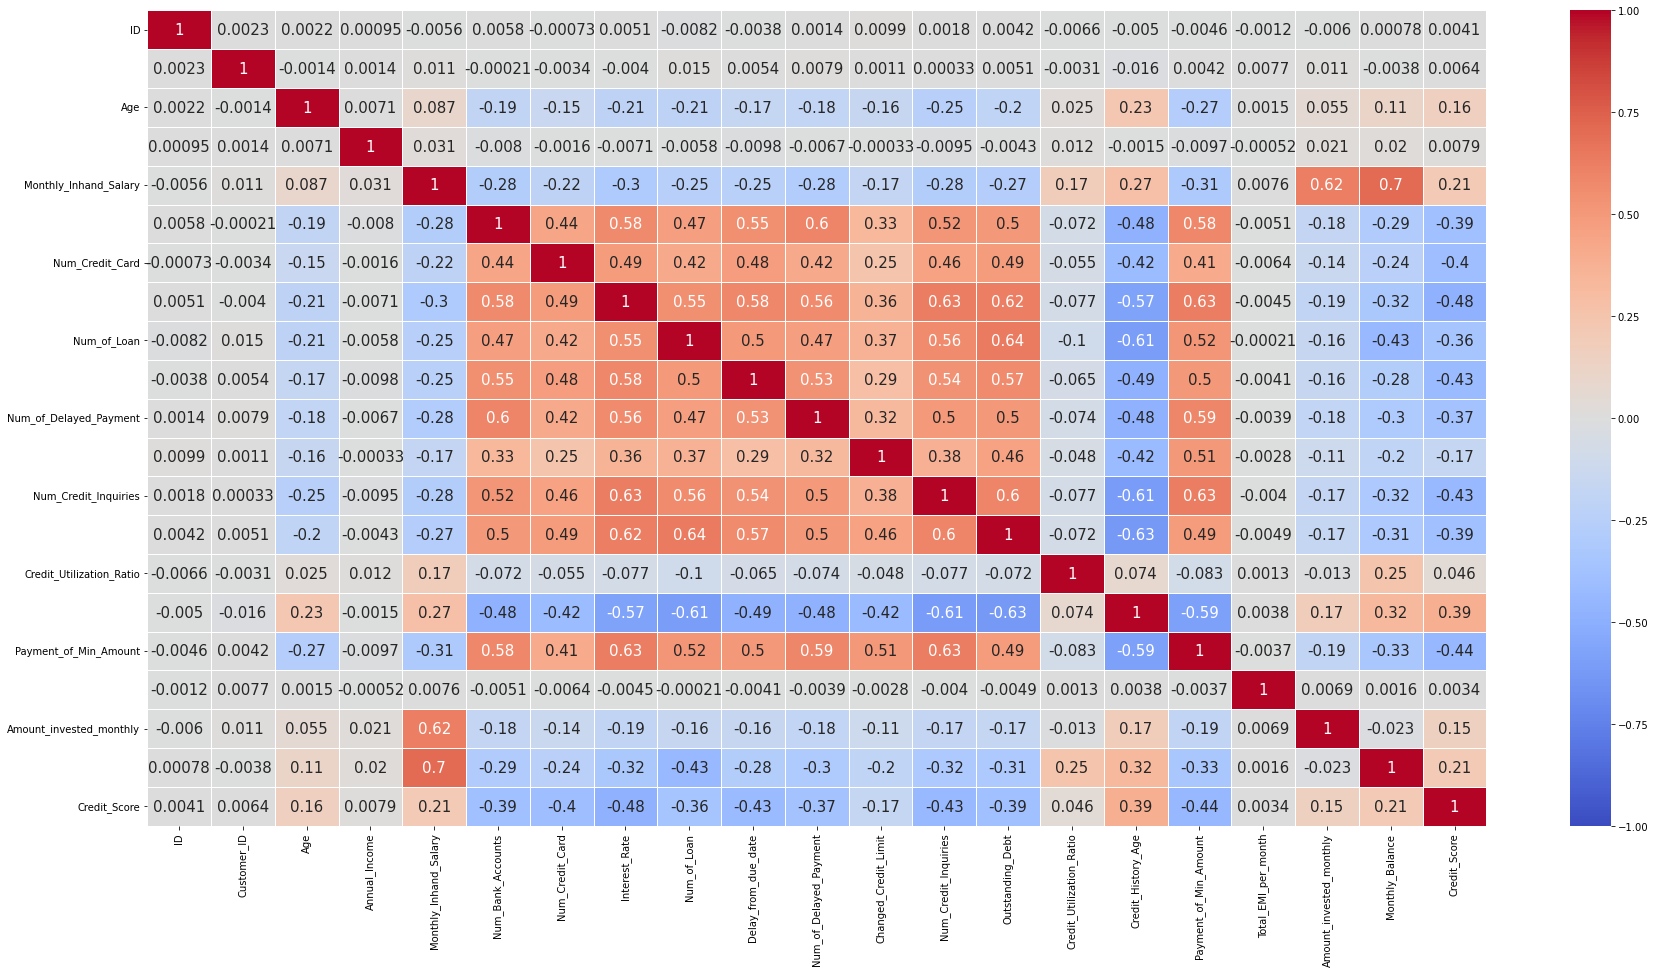

In [82]:
sns.heatmap(corr_mat, cmap='coolwarm', vmin=-1, vmax=1, annot=True, linewidths=1.0, annot_kws={"fontsize":15})
plt.gcf().set_size_inches(30, 15)

Получаем довольно понятные зависимости:
- признаки ID, Customer_ID, Age и Annual_Income некоррелируют ни с одним из признаков;
- признаки Num_Bank_Accounts и Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt сильно коррелируют друг с другом (есть зависимость между этими признаками, что логично);
- признак Monthly_Inhand_Salary влияет на признаки Amount_Invested_monthly и Monthly_Balance (получается, что от месячной зарплаты клиенты сильно зависит баланс клиента и вложения);
- признаки Credit_History_Age и Num_Bank_Accounts отрицательно коррелируют, а значит, чем дольше у клиента счет, тем меньше у него банковских аккаунтов; 
- корреляция между Credit_History_Age и Delay_from_due_date, Num_of_Delayed_Payment, Outstanding_Debt, Payment_of_Min_Amount показывает, что у взрослых меньше задолженностей.

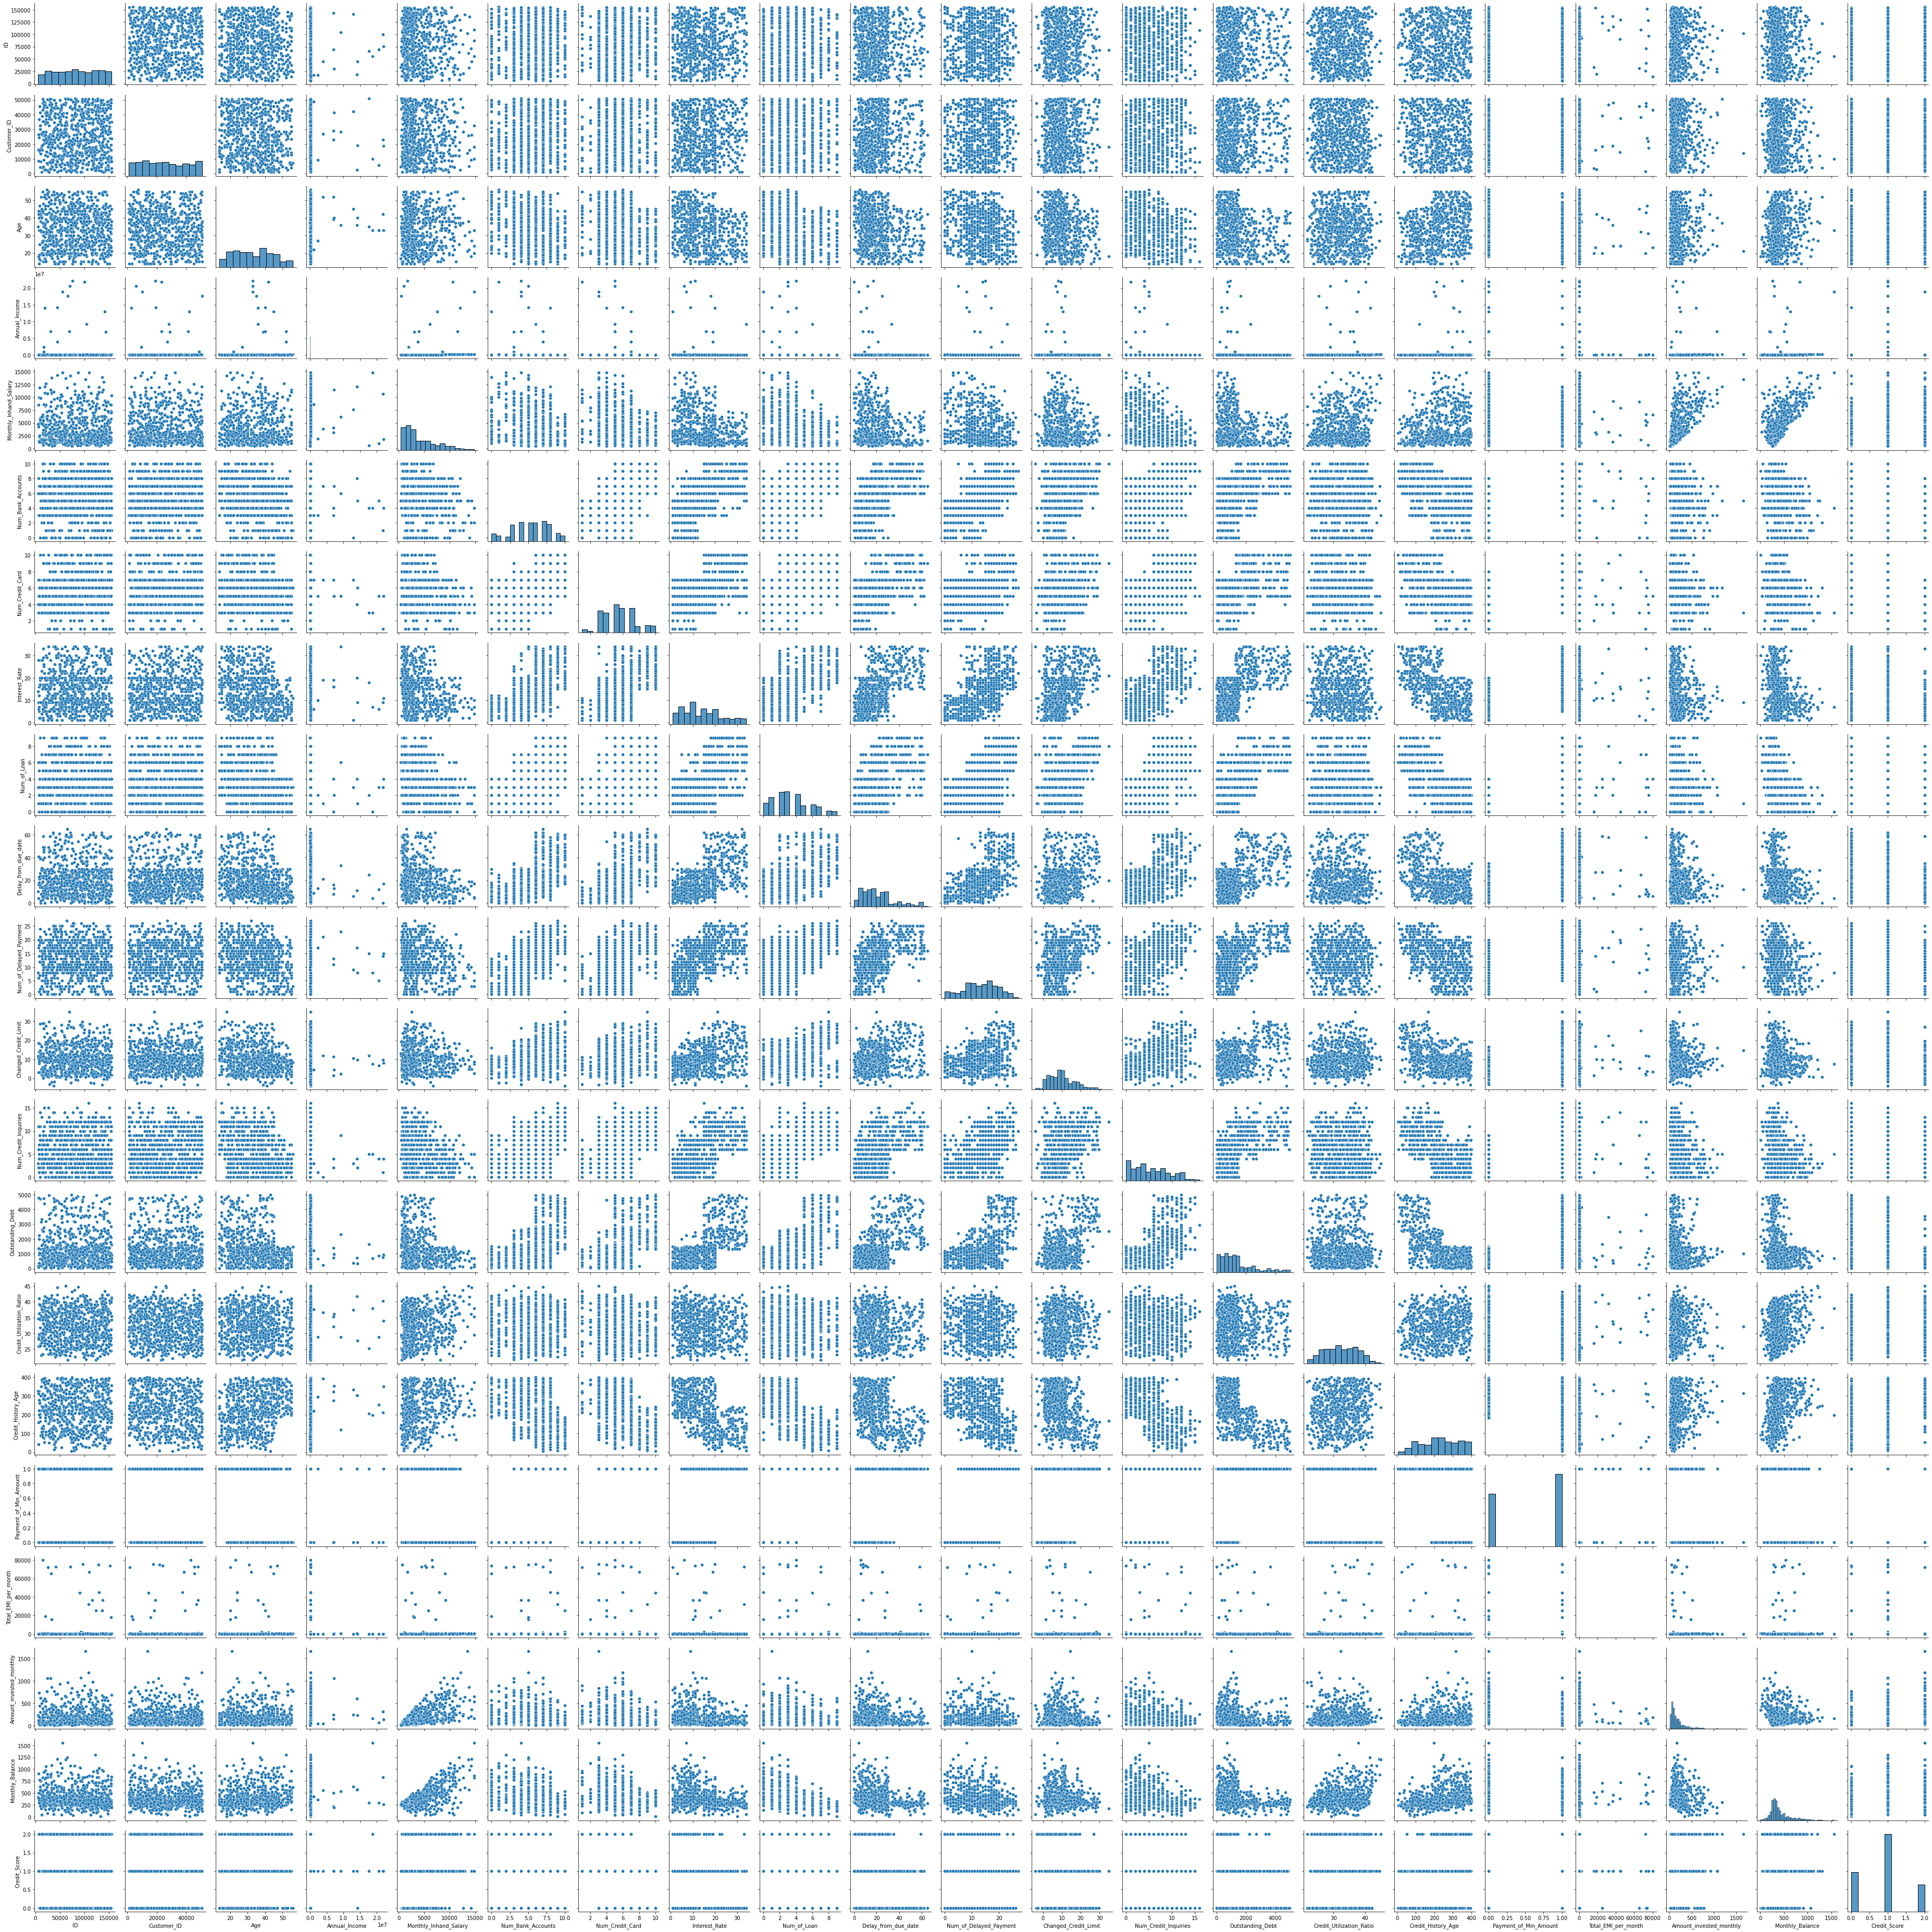

In [83]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(new_data.shape[0]), size=800, replace=False)
sns.pairplot(new_data.iloc[random_subset], diag_kind="hist")
pass

## 3. Обработка пропущенных значений

In [84]:
new_data.isna().sum() 

ID                              0
Customer_ID                     0
Month                           0
Name                         9265
Age                          2577
SSN                          5150
Occupation                   6524
Annual_Income                   0
Monthly_Inhand_Salary       13927
Num_Bank_Accounts              20
Num_Credit_Card                 0
Interest_Rate                1890
Num_of_Loan                  3618
Type_of_Loan                10514
Delay_from_due_date           537
Num_of_Delayed_Payment       6566
Changed_Credit_Limit         1940
Num_Credit_Inquiries         1839
Credit_Mix                  18664
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8381
Payment_of_Min_Amount       11118
Total_EMI_per_month             0
Amount_invested_monthly      8106
Payment_Behaviour            7047
Monthly_Balance              1120
Credit_Score                    0
dtype: int64

Здесь показано, сколько пропущенных значений в каждом столбце. Заполним пропущенные значения медианой (для количественных признаков) и модой (для категориальных признаков).

In [85]:
#для категориальных признаков
new_data['Name'].fillna(new_data['Name'].mode().iloc[0], inplace=True)
new_data['SSN'].fillna(new_data['SSN'].mode().iloc[0], inplace=True)
new_data['Credit_Mix'].fillna(new_data['Credit_Mix'].mode().iloc[0], inplace=True)
new_data['Occupation'].fillna(new_data['Occupation'].mode().iloc[0], inplace=True)
new_data['Type_of_Loan'].fillna(new_data['Type_of_Loan'].mode().iloc[0], inplace=True)
new_data['Payment_Behaviour'].fillna(new_data['Payment_Behaviour'].mode().iloc[0], inplace=True)
new_data.isna().sum() 

#для количественных признаков
new_data.fillna(new_data.median(axis = 0), axis=0 , inplace=True)
new_data.isna().sum() 

C:\Users\1\AppData\Local\Temp\ipykernel_940\2601111277.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data.fillna(new_data.median(axis = 0), axis=0 , inplace=True)


ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Пропущенных значений не осталось. 

## 4. Обработка категориальных признаков

К признакам Month, Occupation, Type_of_Loan, Credit_Mix, Payment_Behaviour применим метод бинаризации.
Бинарные признаки Payment_of_Min_Amount заменим на числовой, а именно на 0 и 1. 

Сначала исключим признаки, которые не влияют на кредитный рейтинг клиента: Name, SNN, ID, Customer_ID, Month, Type_of_Loan.

In [86]:
new_data1 = new_data
new_data1 = new_data1.drop(["Name"], axis = 1)
new_data1 = new_data1.drop(["SSN"], axis = 1)
new_data1 = new_data1.drop(["ID"], axis = 1)
new_data1 = new_data1.drop(["Customer_ID"], axis = 1)
new_data1 = new_data1.drop(["Month"], axis = 1)
new_data1 = new_data1.drop(["Type_of_Loan"], axis = 1)
new_data1.head()

Age Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0  Scientist       19114.12            1824.843333                3.0   
1  23.0  Scientist       19114.12            3093.153333                3.0   
2  33.0  Scientist       19114.12            3093.153333                3.0   
3  23.0  Scientist       19114.12            3093.153333                3.0   
4  23.0  Scientist       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4            3.0          4.0                  3.0   
1                4            3.0          4.0                 18.0   
2                4            3.0          4.0                  3.0   
3                4            3.0          4.0                  5.0   
4                4            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  ...  Credit_Mix  Outstanding_Debt  \
0                     7.0  ...    Standard            809.98   
1                    14.0  ...        Good            809.98   
2                     7.0  ...        Good            809.98   
3                     4.0  ...        Good            809.98   
4                    14.0  ...        Good            809.98   

  Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                26.822620               265.0                    0.0   
1                31.944960               219.0                    0.0   
2                28.609352               267.0                    0.0   
3                31.377862               268.0                    0.0   
4                24.797347               269.0                    0.0   

   Total_EMI_per_month  Amount_invested_monthly  \
0            49.574949                80.415295   
1            49.574949               118.280222   
2            49.574949                81.699521   
3            49.574949               199.458074   
4            49.574949                41.420153   

                  Payment_Behaviour  Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments       312.494089            2  
1    Low_spent_Large_value_payments       284.629162            2  
2   Low_spent_Medium_value_payments       331.209863            2  
3    Low_spent_Small_value_payments       223.451310            2  
4  High_spent_Medium_value_payments       341.489231            2  

[5 rows x 22 columns]

Отобрали признаки. Их осталось 22.

In [87]:
new_data1['Payment_of_Min_Amount'] = pd.factorize(new_data1['Payment_of_Min_Amount'])[0]
Occupation_dummies = pd.get_dummies(new_data1['Occupation'])
Credit_Mix_dummies = pd.get_dummies(new_data1['Credit_Mix'])
Payment_Behaviour_dummies = pd.get_dummies(new_data1['Payment_Behaviour'])
Occupation_dummies.head()

Accountant  Architect  Developer  Doctor  Engineer  Entrepreneur  \
0           0          0          0       0         0             0   
1           0          0          0       0         0             0   
2           0          0          0       0         0             0   
3           0          0          0       0         0             0   
4           0          0          0       0         0             0   

   Journalist  Lawyer  Manager  Mechanic  Media_Manager  Musician  Scientist  \
0           0       0        0         0              0         0          1   
1           0       0        0         0              0         0          1   
2           0       0        0         0              0         0          1   
3           0       0        0         0              0         0          1   
4           0       0        0         0              0         0          1   

   Teacher  Writer  
0        0       0  
1        0       0  
2        0       0  
3        0       0  
4        0       0

In [88]:
new_data1 = pd.concat((new_data1, Occupation_dummies), axis = 1)
new_data1 = pd.concat((new_data1, Credit_Mix_dummies), axis = 1)
new_data1 = pd.concat((new_data1, Payment_Behaviour_dummies), axis = 1)
new_data1 = new_data1.drop(['Occupation'], axis = 1)
new_data1 = new_data1.drop(['Credit_Mix'], axis = 1)
new_data1 = new_data1.drop(['Payment_Behaviour'], axis = 1)
new_data1

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       19114.12            1824.843333                3.0   
1      23.0       19114.12            3093.153333                3.0   
2      33.0       19114.12            3093.153333                3.0   
3      23.0       19114.12            3093.153333                3.0   
4      23.0       19114.12            1824.843333                3.0   
...     ...            ...                    ...                ...   
99995  25.0       39628.99            3359.415833                4.0   
99996  25.0       39628.99            3359.415833                4.0   
99997  25.0       39628.99            3359.415833                4.0   
99998  25.0       39628.99            3359.415833                4.0   
99999  25.0       39628.99            3359.415833                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                    4            3.0          4.0                  3.0   
1                    4            3.0          4.0                 18.0   
2                    4            3.0          4.0                  3.0   
3                    4            3.0          4.0                  5.0   
4                    4            3.0          4.0                  6.0   
...                ...            ...          ...                  ...   
99995                6            7.0          2.0                 23.0   
99996                6            7.0          2.0                 18.0   
99997                6           13.0          2.0                 27.0   
99998                6            7.0          2.0                 20.0   
99999                6            7.0          2.0                 18.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Writer  Bad  Good  \
0                         7.0                 11.27  ...       0    0     0   
1                        14.0                 11.27  ...       0    0     1   
2                         7.0                  9.42  ...       0    0     1   
3                         4.0                  6.27  ...       0    0     1   
4                        14.0                 11.27  ...       0    0     1   
...                       ...                   ...  ...     ...  ...   ...   
99995                     7.0                 11.50  ...       0    0     0   
99996                     7.0                 11.50  ...       0    0     0   
99997                     6.0                 11.50  ...       0    0     1   
99998                    14.0                 11.50  ...       0    0     1   
99999                     6.0                 11.50  ...       0    0     1   

       Standard  High_spent_Large_value_payments  \
0             1                                0   
1             0                                0   
2             0                                0   
3             0                                0   
4             0                                0   
...         ...                              ...   
99995         1                                1   
99996         1                                0   
99997         0                                1   
99998         0                                0   
99999         0                                0   

       High_spent_Medium_value_payments  High_spent_Small_value_payments  \
0                                     0                                1   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     1                                0   
...                                 ...                              ...   
99995                                 0                                0   
99996                                 1                     

За счет бинаризации столбцов стало почти в 2 раза больше. Но теперь все признаки числовые, с ними будет удобно работать.

## 5. Проведение нормализации

Нормализация - это изменение диапазонов в данных без изменения формы распределения, а стандартизация - это изменение формы распределения данных. Выполним стандартизацию всех признаков, так как в дальнейших пунктах пригодится именно она.

In [89]:
new_data2 = (new_data1 - new_data1.mean(axis = 0)) / new_data1.std(axis = 0)
new_data2.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 -0.969034      -0.110019              -0.744957          -0.920072   
1 -0.969034      -0.110019              -0.316053          -0.920072   
2 -0.028188      -0.110019              -0.316053          -0.920072   
3 -0.969034      -0.110019              -0.316053          -0.920072   
4 -0.969034      -0.110019              -0.744957          -0.920072   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0        -0.743964      -1.324462     0.202443            -1.235662   
1        -0.743964      -1.324462     0.202443            -0.217296   
2        -0.743964      -1.324462     0.202443            -1.235662   
3        -0.743964      -1.324462     0.202443            -1.099880   
4        -0.743964      -1.324462     0.202443            -1.031988   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...    Writer       Bad  \
0               -1.076307              0.131908  ... -0.250579 -0.483945   
1                0.096665              0.131908  ... -0.250579 -0.483945   
2               -1.076307             -0.143368  ... -0.250579 -0.483945   
3               -1.579009             -0.612081  ... -0.250579 -0.483945   
4                0.096665              0.131908  ... -0.250579 -0.483945   

       Good  Standard  High_spent_Large_value_payments  \
0 -0.563749  0.870199                        -0.398404   
1  1.773821 -1.149150                        -0.398404   
2  1.773821 -1.149150                        -0.398404   
3  1.773821 -1.149150                        -0.398404   
4  1.773821 -1.149150                        -0.398404   

   High_spent_Medium_value_payments  High_spent_Small_value_payments  \
0                         -0.461643                         2.789509   
1                         -0.461643                        -0.358482   
2                         -0.461643                        -0.358482   
3                         -0.461643                        -0.358482   
4                          2.166152                        -0.358482   

   Low_spent_Large_value_payments  Low_spent_Medium_value_payments  \
0                       -0.341225                        -0.401635   
1                        2.930587                        -0.401635   
2                       -0.341225                         2.489795   
3                       -0.341225                        -0.401635   
4                       -0.341225                        -0.401635   

   Low_spent_Small_value_payments  
0                       -0.702226  
1                       -0.702226  
2                       -0.702226  
3                        1.424027  
4                       -0.702226  

[5 rows x 43 columns]

## 6. Разбиение данных на обучающую и тестовую выборку

In [90]:
X = new_data2.drop(["Credit_Score"], axis=1)
y = new_data1["Credit_Score"]

In [91]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int64

In [92]:
X.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 -0.969034      -0.110019              -0.744957          -0.920072   
1 -0.969034      -0.110019              -0.316053          -0.920072   
2 -0.028188      -0.110019              -0.316053          -0.920072   
3 -0.969034      -0.110019              -0.316053          -0.920072   
4 -0.969034      -0.110019              -0.744957          -0.920072   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0        -0.743964      -1.324462     0.202443            -1.235662   
1        -0.743964      -1.324462     0.202443            -0.217296   
2        -0.743964      -1.324462     0.202443            -1.235662   
3        -0.743964      -1.324462     0.202443            -1.099880   
4        -0.743964      -1.324462     0.202443            -1.031988   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...    Writer       Bad  \
0               -1.076307              0.131908  ... -0.250579 -0.483945   
1                0.096665              0.131908  ... -0.250579 -0.483945   
2               -1.076307             -0.143368  ... -0.250579 -0.483945   
3               -1.579009             -0.612081  ... -0.250579 -0.483945   
4                0.096665              0.131908  ... -0.250579 -0.483945   

       Good  Standard  High_spent_Large_value_payments  \
0 -0.563749  0.870199                        -0.398404   
1  1.773821 -1.149150                        -0.398404   
2  1.773821 -1.149150                        -0.398404   
3  1.773821 -1.149150                        -0.398404   
4  1.773821 -1.149150                        -0.398404   

   High_spent_Medium_value_payments  High_spent_Small_value_payments  \
0                         -0.461643                         2.789509   
1                         -0.461643                        -0.358482   
2                         -0.461643                        -0.358482   
3                         -0.461643                        -0.358482   
4                          2.166152                        -0.358482   

   Low_spent_Large_value_payments  Low_spent_Medium_value_payments  \
0                       -0.341225                        -0.401635   
1                        2.930587                        -0.401635   
2                       -0.341225                         2.489795   
3                       -0.341225                        -0.401635   
4                       -0.341225                        -0.401635   

   Low_spent_Small_value_payments  
0                       -0.702226  
1                       -0.702226  
2                       -0.702226  
3                        1.424027  
4                       -0.702226  

[5 rows x 42 columns]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((69489, 42), (23164, 42))

## 7-9. Классификатор k - ближайших соседей. Выбор оптимального k

Чтобы выбрать оптимальное k, рассмотрим разные варианты. Изучим, как изменяется величина ошибки.

2 ближайших соседа:

In [94]:
model = KNeighborsClassifier(n_neighbors=2, p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.16202564434658723, 0.3382835434294595)

4 ближайших соседа:

In [95]:
model = KNeighborsClassifier(n_neighbors=4, p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.195512958885579, 0.31488516663788635)

6 ближайших соседей:

In [96]:
model = KNeighborsClassifier(n_neighbors=6, p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.2182791520960152, 0.30793472629943014)

8 ближайших соседей:

In [94]:
model = KNeighborsClassifier(n_neighbors=8, p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.23511634935025688, 0.3069849766879641)

10 ближайших соседей:

In [95]:
model = KNeighborsClassifier(n_neighbors=10, p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.24554965534113313, 0.3065532723191159)

12 ближайших соседей:

In [100]:
model = KNeighborsClassifier(n_neighbors=12, p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.25388190936695015, 0.30651010188223105)

14 ближайших соседей:

In [96]:
model = KNeighborsClassifier(n_neighbors=14, p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.2605880067348789, 0.3074166810568123)

18 ближайших соседей:

In [97]:
model = KNeighborsClassifier(n_neighbors=18, p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.2695966268042424, 0.3098342255223623)

22 ближайших соседа:

In [98]:
model = KNeighborsClassifier(n_neighbors=22, p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.2773820316884687, 0.310136418580556)

Получаем:

| k | Ошибка (обучающая выборка) | Ошибка (тестовая выборка) |
| :----------------: | :--------------------------: | :------------------------: |
| 2 соседа | 0.162 (16,2%) | 0.3382 (33,82%) |
| 4 соседа | 0.196 (19,6%) | 0.3149 (31,49%) |
| 6 соседей | 0.218 (21,8%)| 0.3079 (30,79%) |
| 8 соседей | 0.235 (23,5%)| 0.3070 (30,70%) |
| 10 соседей | 0.246 (24,6%) | 0.3066 (30,66%) |
| 12 соседей | 0.254 (25,4%) | 0.3065 (30,65%) |
| 14 соседей | 0.261 (26,1%) | 0.3074 (30,74%) |
| 18 соседей | 0.270 (27,0%) | 0.3098 (30,98%) |
| 22 соседа | 0.277 (27,7%) | 0.3101 (31,01%) |

Все результаты были занесены в таблицу. Из неё можно сделать вывод, что для тестовой выборки оптимальным параметром является k = 12, а для обучающей выборки k = 2.
Если говорить про худшие результаты, то на тестовой выборке его показали при k = 2, а на обучающей при k = 22. 

## 13. Выводы

* В данной работе была изучена финансовая компания, которая хранит данные о своих клиентах. 
* Была произведена огромная работа касаемо предъобработки данных, а именно работа с выбросами, пропущенными значениями, недопустимыми значениями. 
* Были рассмотрены основные характеристики, проведена визуализация данных.
* Также была проведена нормализация данных.
* Рассмотрели корреляционную таблицу, сделали выводы, какие признаки сильно коррелируют между собой, а какие нет.
* Используя метод k - ближайших соседей было реализовано обучение данной модели, которая предсказываем кредитный рейтинг клиента фирмы. Можно сделать вывод, что данный метод показал себя не лучшим образом. Это может быть связано с тем, что в фирме были выделены не все признаки, которые могут влиять на кредитный рейтинг клиента.

## 14. Обучение нейронной сети

Необходимо обучить на данных логистическую регрессию, RandomForest, полносвязную (неглубокую - скрытых 1-2 слоя) нейронную сеть. По крайней мере для одной из моделей найти оптимальные занчения гиперпарамтров и построить графики зависимости ошибки от них. 
Также ответить на вопросы:
- Наблюдается ли переобучение/недообучение? 
- Какой метод лучше? 

Для обучения нейронной сети понадобятся некоторые библиотеки:

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#### Возьмем 1 слой, будем менять число нейронов на скрытом слое и параметр альфа.

Для каждой модели посчитаем ошибку и точность на обучающей и тестовой выборке.

In [97]:
trainError_1 = []
testError_1 = []
trainCorrect_1 = []
testCorrect_1 = []

alphaArr_1 = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
NArr_1 = [1, 3, 5, 10, 20, 50, 70, 100, 150, 200, 250, 300] # Число нейронов на скрытом слое

Train_accuracy_1 = pd.DataFrame(0., index = alphaArr_1, columns = NArr_1)
Test_accuracy_1 = pd.DataFrame(0., index = alphaArr_1, columns = NArr_1)

Train_error_1 = pd.DataFrame(0., index = alphaArr_1, columns = NArr_1)
Test_error_1 = pd.DataFrame(0., index = alphaArr_1, columns = NArr_1)

for count_narr in NArr_1 :
    for alpha in alphaArr_1 :

        print(count_narr, alpha)
        mlp_model = MLPClassifier(hidden_layer_sizes = (count_narr, 1), solver = 'lbfgs', activation = 'logistic',random_state = 42,alpha = alpha)
        mlp_model.fit(X_train, y_train)

        y_train_predict = mlp_model.predict(X_train)
        y_test_predict  = mlp_model.predict(X_test)

        Train_error_1[count_narr][alpha] = np.mean(y_train != y_train_predict)
        Test_error_1[count_narr][alpha] = np.mean(y_test != y_test_predict)
        Train_accuracy_1[count_narr][alpha] = accuracy_score(y_train, y_train_predict)
        Test_accuracy_1[count_narr][alpha] = accuracy_score(y_test, y_test_predict)

1 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1 0.01
1 0.1
1 0.5
1 1
1 5
1 10
1 50
1 100
3 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 10
3 50
3 100
5 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 50
5 100
10 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 100


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 100


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 100
70 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 100
100 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 100
150 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 100
200 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 100
250 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 50
250 100
300 0.0001
300 0.001
300 0.01
300 0.1
300 0.5
300 1
300 5
300 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 100


Посчитаем максимальную точность, а также минимальную ошибку на обеих выборках.

In [98]:
max_accuracy_test_1 = Test_accuracy_1.values.max()
max_accuracy_train_1 = Train_accuracy_1.values.max()
min_error_test_1 = Test_error_1.values.min()
min_error_train_1 = Train_error_1.values.min()

Mask = ((Test_accuracy_1 == max_accuracy_test_1) | (Train_accuracy_1 == max_accuracy_train_1) | (Test_error_1 == min_error_test_1) | (Train_error_1 == min_error_train_1))

Результаты подсчета приведены ниже.

In [99]:
print("Минимальная ошибка на обучабщей выборке составила: ", min_error_train_1)
print("Минимальная ошибка на тестовой выборке составила: ", min_error_test_1 )
print("Максимальная точность на обучабщей выборке составила: ", max_accuracy_train_1)
print("Максимальная точность на тестовой выборке составила: ", max_accuracy_test_1)

Минимальная ошибка на обучабщей выборке составила:  0.3032422397789578
Минимальная ошибка на тестовой выборке составила:  0.3152305301329649
Максимальная точность на обучабщей выборке составила:  0.6967577602210422
Максимальная точность на тестовой выборке составила:  0.684769469867035


Построим график ошибок в зависимости от параметра alpha в виде тепловой карты (чем холоднее цвет, тем лучше результат). Так же в ячейке с лучшим результатом написано соответсвующее значение ошибки.

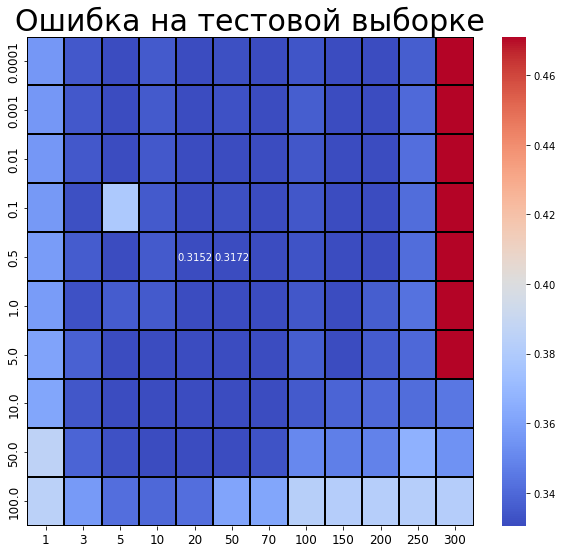

In [100]:
plt.figure(figsize=(10, 9))
plt.plot()
sns.heatmap(Test_error_1, annot = round(Test_error_1[Mask], 4).fillna(''), cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black', vmin = Test_error_1.quantile(0.9).min())
plt.title('Ошибка на тестовой выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

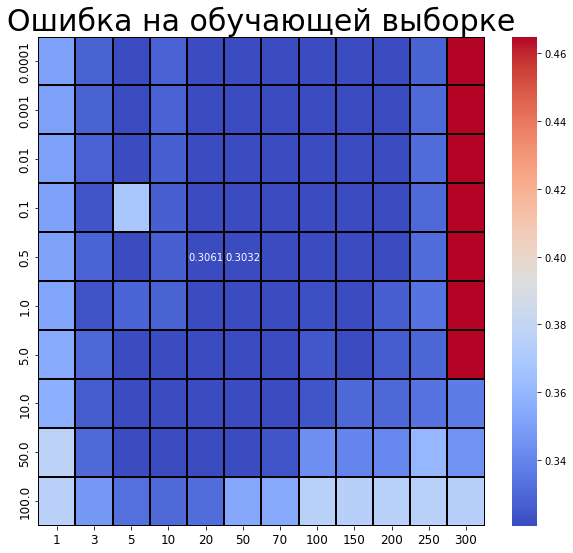

In [101]:
plt.figure(figsize=(10, 9))
plt.plot()
sns.heatmap(Train_error_1, annot = round(Train_error_1[Mask], 4).fillna(''), cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black', vmin = Train_error_1.quantile(0.9).min())
plt.title('Ошибка на обучающей выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

По данным графикам можно сделать вывод, что самые хорошие значения получаются при alpha = 0.5 и двух значениях N (N = 20, N = 50). На обучающей выборке при N = 50 результаты чуть лучше, поэтому построить график ошибок на выборках от параметра alpha при оптимальном количестве нейронов на слое, а именно при N = 50.

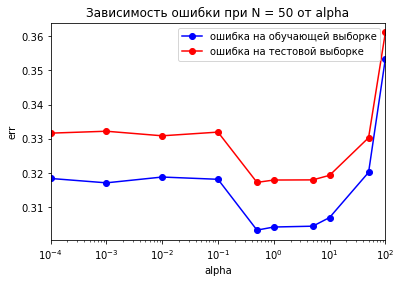

In [108]:
plt.semilogx(alphaArr_1, Train_error_1[50], 'b-o', label = 'ошибка на обучающей выборке')
plt.semilogx(alphaArr_1, Test_error_1[50], 'r-o', label = 'ошибка на тестовой выборке')
plt.xlim([np.min(alphaArr_1), np.max(alphaArr_1)])
plt.title('Зависимость ошибки при N = 50 от alpha')
plt.xlabel('alpha')
plt.ylabel('err')
plt.legend()

Теперь переходим к точности. Также удобнее всего сделать вывод по тепловой карте.  В этом случае результат более хороший, когда цвет теплее.

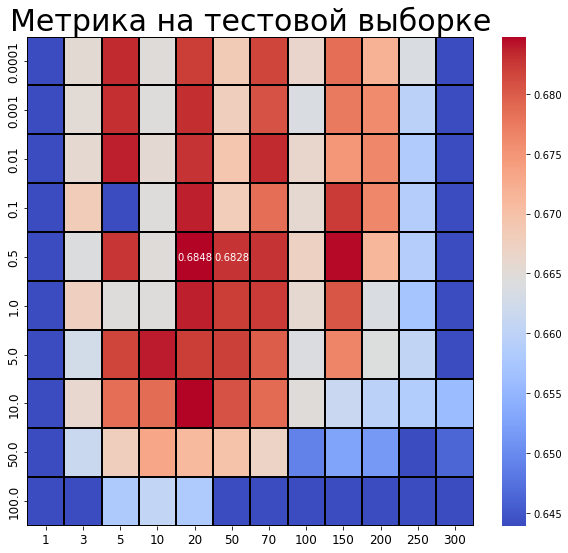

In [103]:
plt.figure(figsize=(10, 9))
plt.plot()
sns.heatmap(Test_accuracy_1, annot = round(Test_accuracy_1[Mask], 4).fillna(''), cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black', vmin = Test_accuracy_1.quantile(0.9).min())
plt.title('Метрика на тестовой выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

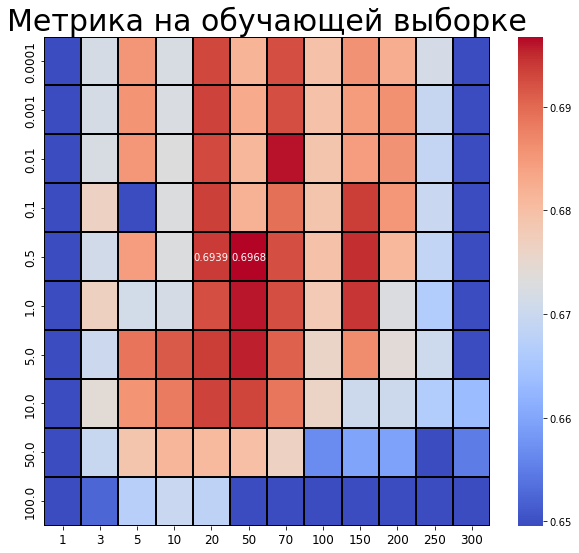

In [104]:
plt.figure(figsize=(10, 9))
plt.plot()
sns.heatmap(Train_accuracy_1, annot = round(Train_accuracy_1[Mask], 4).fillna(''), cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black', vmin = Train_accuracy_1.quantile(0.9).min())
plt.title('Метрика на обучающей выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show

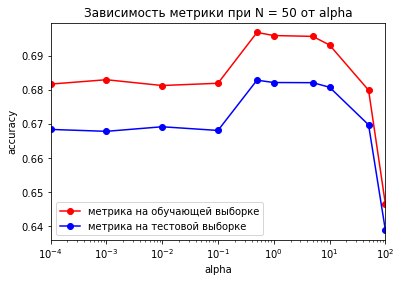

In [109]:
plt.semilogx(alphaArr_1, Train_accuracy_1[50], 'r-o', label = 'метрика на обучающей выборке')
plt.semilogx(alphaArr_1, Test_accuracy_1[50], 'b-o', label = 'метрика на тестовой выборке')
plt.xlim([np.min(alphaArr_1), np.max(alphaArr_1)])
plt.title('Зависимость метрики при N = 50 от alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

Здесь также, что логично, вариант при alpha = 0.5 для N = 50 наилучший.

По всему рассмотренному, можно сделать вывод, что самое оптимальное сочетание параметров из рассмотренных alpha = 0.5, N = 50. 
Переобучим модель с данными параметрами.

In [106]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,1), solver = 'lbfgs', activation = 'logistic', random_state = 42, alpha = 0.5)
mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict  = mlp_model.predict(X_test) 

C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Получаем:

In [107]:
print(f'Ошибка на обучающей выборке составила {np.mean(y_train != y_train_predict)}')
print(f'Ошибка на тестовой выборке составила {np.mean(y_test != y_test_predict)}')
print(f'Точность на обучающей выборке составила {accuracy_score(y_train, y_train_predict)}')
print(f'Точность на тестовой выборке составила {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающей выборке составила 0.3032422397789578
Ошибка на тестовой выборке составила 0.3172163702296667
Точность на обучающей выборке составила 0.6967577602210422
Точность на тестовой выборке составила 0.6827836297703332


Также переобучим и модель с параметрами alpha = 0.5, N = 20.

In [112]:
mlp_model = MLPClassifier(hidden_layer_sizes = (20,1), solver = 'lbfgs', activation = 'logistic', random_state = 42, alpha = 0.5)
mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict  = mlp_model.predict(X_test) 

C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Получаем:

In [113]:
print(f'Ошибка на обучающей выборке составила {np.mean(y_train != y_train_predict)}')
print(f'Ошибка на тестовой выборке составила {np.mean(y_test != y_test_predict)}')
print(f'Точность на обучающей выборке составила {accuracy_score(y_train, y_train_predict)}')
print(f'Точность на тестовой выборке составила {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающей выборке составила 0.3061491746895192
Ошибка на тестовой выборке составила 0.3152305301329649
Точность на обучающей выборке составила 0.6938508253104808
Точность на тестовой выборке составила 0.684769469867035


По данным результатам можно сделать вывод, что нет переобучения или недообучения. Об этом свидетельствует то, что алгоритм справляется с задачей одинако на обучающей и тестовой выборках.

 #### Теперь возьмем 2 слоя, также будем менять число нейронов и параметр альфа.

Будем использовать несколько моделей, которые обучим на данных. Для каждой модели вычислим ошибку и точность на тестовой и обучающей выборке.

In [110]:
trainError_2 = []
testError_2 = []
trainCorrect_2 = []
testCorrect_2 = []

alphaArr_2 = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
NArr_2 = [1, 3, 5, 10, 20, 50, 70, 100, 150, 200, 250, 300] # Число нейронов на скрытом слое

Train_accuracy_2 = pd.DataFrame(0., index = alphaArr_2, columns = NArr_2)
Test_accuracy_2 = pd.DataFrame(0., index = alphaArr_2, columns = NArr_2)
Train_error_2 = pd.DataFrame(0., index = alphaArr_2, columns = NArr_2)
Test_error_2 = pd.DataFrame(0., index = alphaArr_2, columns = NArr_2)

for count_narr in NArr_2 :
    for alpha in alphaArr_2 :
        print(count_narr, alpha)
        mlp_model = MLPClassifier(hidden_layer_sizes = (count_narr,2), solver = 'lbfgs', activation = 'logistic', random_state = 42,alpha = alpha)
        mlp_model.fit(X_train, y_train)

        y_train_predict = mlp_model.predict(X_train)
        y_test_predict  = mlp_model.predict(X_test)

        Train_error_2[count_narr][alpha] = np.mean(y_train != y_train_predict)
        Test_error_2[count_narr][alpha] = np.mean(y_test != y_test_predict)
        Train_accuracy_2[count_narr][alpha] = accuracy_score(y_train, y_train_predict)
        Test_accuracy_2[count_narr][alpha] = accuracy_score(y_test, y_test_predict)

1 0.0001
1 0.001
1 0.01
1 0.1
1 0.5
1 1
1 5
1 10
1 50
1 100
3 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 50
3 100
5 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 100
10 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 100


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 100


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 100


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 100


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 100


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 100


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 100


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 100


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 0.0001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 0.001


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 0.01


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 0.1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 0.5


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 1


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 5
300 10


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 50


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 100


C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Посчитаем максимальную точность, а также минимальную ошибку на обеих выборках.

In [114]:
max_accuracy_test_2 = Test_accuracy_2.values.max()
max_accuracy_train_2 = Train_accuracy_2.values.max()
min_error_test_2 = Test_error_2.values.min()
min_error_train_2 = Train_error_2.values.min()

Mask = ((Test_accuracy_2 == max_accuracy_test_2) | (Train_accuracy_2 == max_accuracy_train_2) | (Test_error_2 == min_error_test_2) | (Train_error_2 == min_error_train_2))

Результаты выведены ниже.

In [115]:
print("Минимальная ошибка на обучабщей выборке составила: ", min_error_train_2)
print("Минимальная ошибка на тестовой выборке составила: ", min_error_test_2)
print("Максимальная точность на обучабщей выборке составила: ", max_accuracy_train_2)
print("Максимальная точность на тестовой выборке составила: ", max_accuracy_test_2)

Минимальная ошибка на обучабщей выборке составила:  0.2894414943372332
Минимальная ошибка на тестовой выборке составила:  0.3042652391642203
Максимальная точность на обучабщей выборке составила:  0.7105585056627668
Максимальная точность на тестовой выборке составила:  0.6957347608357797


Построим график ошибок в зависимости от параметра alpha в виде тепловой карты (чем холоднее цвет, тем лучше результат). Так же в ячейке с лучшим результатом написано соответсвующее значение ошибки.

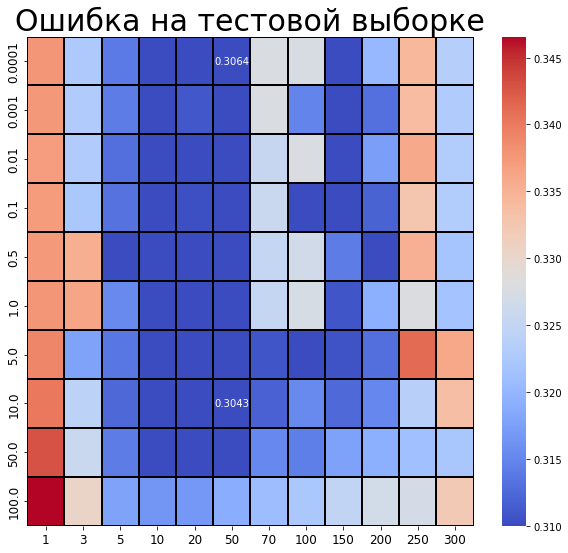

In [116]:
plt.figure(figsize=(10, 9))
plt.plot()
sns.heatmap(Test_error_2, annot = round(Test_error_2[Mask], 4).fillna(''), cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black', vmin = Test_error_2.quantile(0.9).min())
plt.title('Ошибка на тестовой выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

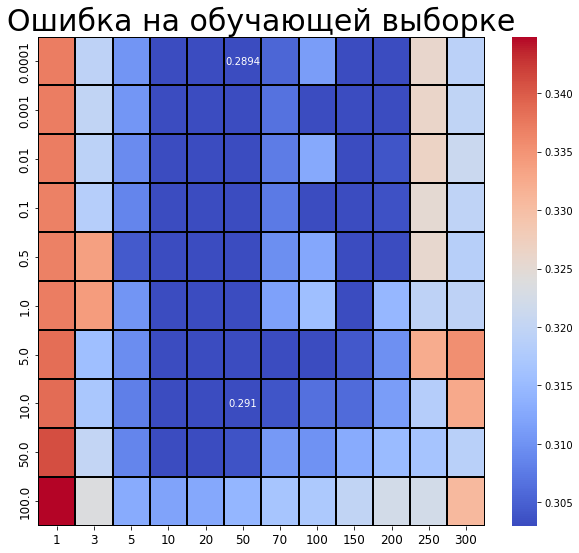

In [117]:
plt.figure(figsize=(10, 9))
plt.plot()
sns.heatmap(Train_error_2, annot = round(Train_error_2[Mask], 4).fillna(''), cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black', vmin = Train_error_2.quantile(0.9).min())
plt.title('Ошибка на обучающей выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Можно заметить, что лучшие результаты опять же при N = 50. Но параметр alpha принимает два оптимальных варианта.
Для N = 50 alpha = 10; для N = 50 alpha = 0.0001.
Построим график ошибок на выборках от параметра alpha при оптимальном количестве нейронов на слое. Построим для N = 50, так как там на обучающей выборке результат ошибки чуть лучше.

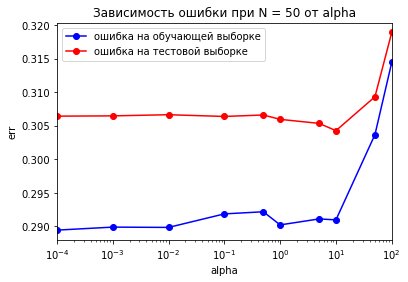

In [118]:
plt.semilogx(alphaArr_2, Train_error_2[50], 'b-o', label = 'ошибка на обучающей выборке')
plt.semilogx(alphaArr_2, Test_error_2[50], 'r-o', label = 'ошибка на тестовой выборке')
plt.xlim([np.min(alphaArr_2), np.max(alphaArr_2)])
plt.title('Зависимость ошибки при N = 50 от alpha')
plt.xlabel('alpha')
plt.ylabel('err')
plt.legend()

Данный рисунок подтвержает, что оптимальный параметр alpha верный.

Снова переходим к точности. Вывод будем делать по тепловой карте (результат более хороший, когда цвет теплый).

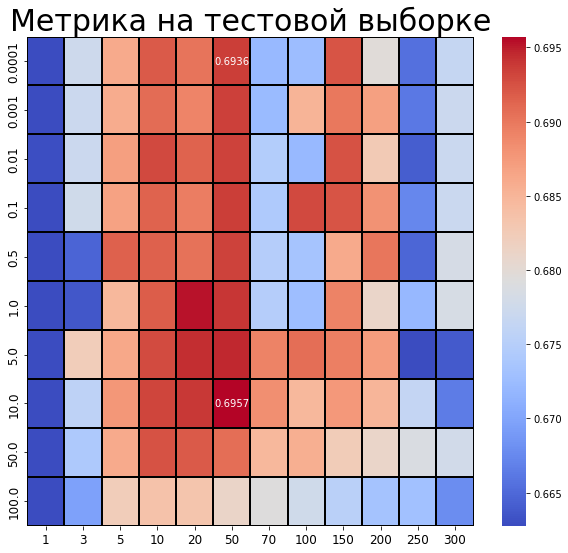

In [119]:
plt.figure(figsize=(10, 9))
plt.plot()
sns.heatmap(Test_accuracy_2, annot = round(Test_accuracy_2[Mask], 4).fillna(''), cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black', vmin = Test_accuracy_2.quantile(0.9).min())
plt.title('Метрика на тестовой выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

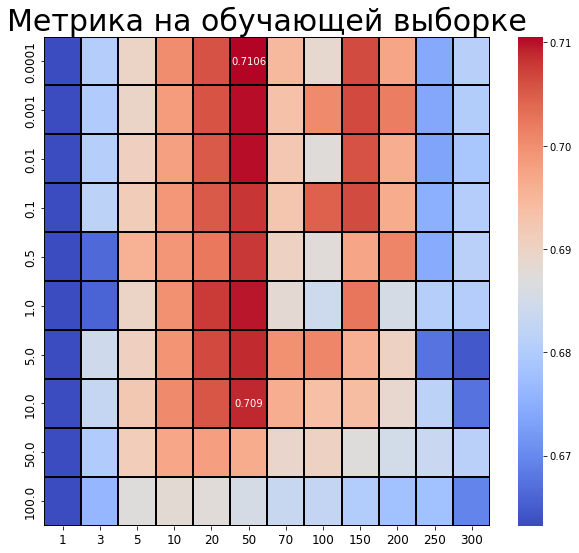

In [120]:
plt.figure(figsize=(10, 9))
plt.plot()
sns.heatmap(Train_accuracy_2, annot = round(Train_accuracy_2[Mask], 4).fillna(''), cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black', vmin = Train_accuracy_2.quantile(0.9).min())
plt.title('Метрика на обучающей выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show

Здесь также можно сделать вывод, что оптимальными парами параметров являются: N = 50, alpha = 10, а также N = 50, alpha = 0.0001.

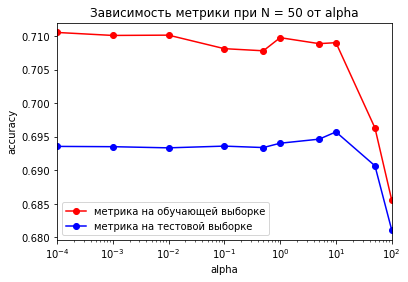

In [121]:
plt.semilogx(alphaArr_2, Train_accuracy_2[50], 'r-o', label = 'метрика на обучающей выборке')
plt.semilogx(alphaArr_2, Test_accuracy_2[50], 'b-o', label = 'метрика на тестовой выборке')
plt.xlim([np.min(alphaArr_2), np.max(alphaArr_2)])
plt.title('Зависимость метрики при N = 50 от alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

Данный график подтверждает выводы, сделанные ранее.

Переобучим модель с параметрами alpha = 0.0001, N = 50.

In [122]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,2), solver = 'lbfgs', activation = 'logistic', random_state = 42, alpha = 0.0001)
mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict  = mlp_model.predict(X_test) 

C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Получаем:

In [123]:
print(f'Ошибка на обучающей выборке составила {np.mean(y_train != y_train_predict)}')
print(f'Ошибка на тестовой выборке составила {np.mean(y_test != y_test_predict)}')
print(f'Метрика на обучающей выборке составила {accuracy_score(y_train, y_train_predict)}')
print(f'Метрика на тестовой выборке составила {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающей выборке составила 0.2894414943372332
Ошибка на тестовой выборке составила 0.3064237610084614
Метрика на обучающей выборке составила 0.7105585056627668
Метрика на тестовой выборке составила 0.6935762389915386


И также переобучим модель с параметрами alpha = 10, N = 50.

In [126]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,2), solver = 'lbfgs', activation = 'logistic', random_state = 42, alpha = 10.0)
mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict  = mlp_model.predict(X_test) 

C:\Users\1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Получаем:

In [127]:
print(f'Ошибка на обучающей выборке составила {np.mean(y_train != y_train_predict)}')
print(f'Ошибка на тестовой выборке составила {np.mean(y_test != y_test_predict)}')
print(f'Метрика на обучающей выборке составила {accuracy_score(y_train, y_train_predict)}')
print(f'Метрика на тестовой выборке составила {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающей выборке составила 0.2909669156269338
Ошибка на тестовой выборке составила 0.3042652391642203
Метрика на обучающей выборке составила 0.7090330843730662
Метрика на тестовой выборке составила 0.6957347608357797


В результате работы было проведено обучение модели полносвязной (неглубокой) нейронной сети с одним и двумя скрытыми слоями. 

Были определены наилучшие пары N и alpha, среди представленных наборов. Лучшие результаты я занесла в таблицу.

| Число слоев | N | alpha | Ошибка (тестовая выборка) | Точность (тестовая выборка) | Ошибка (обуч. выборка) | Точность (обуч. выборка) |
| :-------------: |:----- : |:---: | :----------------------: | :--------------------: |:---------------------: | :--------------------: |
|  1  |  20  |  0.5     |  0.3152  |  0.6848  |  0.3061  |  0.6939  |
|  1  |  50  |  0.5     |  0.3172  |  0.6828  |  0.3032  |  0.6968  |
|  2  |  50  |  10.0    |  0.3043  |  0.6957  |  0.2910  |  0.7090  |
|  2  |  50  |  0.0001  |  0.3064  |  0.6936  |  0.2894  |  0.7106  |

Все четыре модели показывают очень хорошие и похожие результаты. 

Лучше всего применять 2 скрытых слоя и использовать пару значений alpha = 10.0, N = 50 
Так ошибка на тестовой выборке минимальна среди всех возможных: 30,43%, а точность максимальна: 69,57%.

Если сравнивать с KNN, то нейронные сети дали чуть получше результат. В данном cлучае нет сильного разрыва между ошибками на обучающей и тестовой выборках, что значительно лучше.